In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Para reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)


In [3]:
# Subir el archivo CSV manualmente
from google.colab import files
uploaded = files.upload()


df = pd.read_csv('DailyDelhiClimateTrain.csv')
df.head()


Saving DailyDelhiClimateTrain.csv to DailyDelhiClimateTrain (1).csv


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
# Convertir la columna de fecha a tipo datetime y ordenar por fecha (si aplica)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Seleccionamos la columna de interés y otras variables (si es necesario)
# En este ejemplo, usaremos solo la temperatura media
data = df['meantemp'].values.reshape(-1, 1)

# Escalamos los datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Función para crear secuencias a partir de los datos
def create_sequences(dataset, sequence_length=50):
    X, y = [], []
    for i in range(len(dataset) - sequence_length):
        X.append(dataset[i:i+sequence_length])
        y.append(dataset[i+sequence_length])
    return np.array(X), np.array(y)

# Definir la longitud de la secuencia y crear las secuencias
sequence_length = 50
X, y = create_sequences(data_scaled, sequence_length)

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


Forma de X: (1412, 50, 1)
Forma de y: (1412, 1)


In [6]:
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compilación del modelo con el optimizador Adam
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0955 - val_loss: 0.0065
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0063 - val_loss: 0.0066
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0047 - val_loss: 0.0045
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


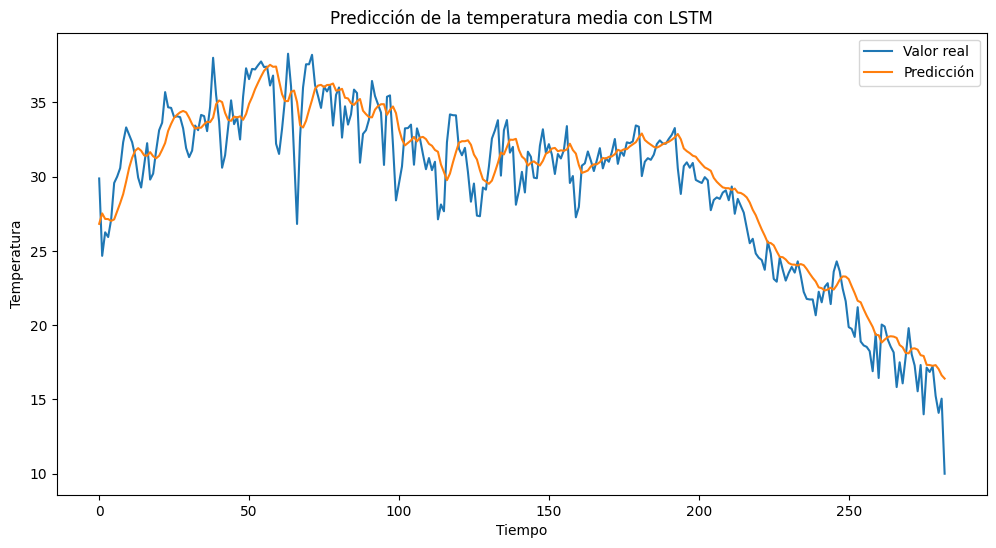

In [8]:
# Realizamos predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Invertir la escala para poder interpretar los resultados
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Valor real')
plt.plot(y_pred_inv, label='Predicción')
plt.title('Predicción de la temperatura media con LSTM')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.legend()
plt.show()


En este proyecto se utilizó el Delhi Climate Dataset para desarrollar un modelo LSTM orientado a la predicción de la temperatura media diaria. La elección del modelo LSTM se justificó por su capacidad para capturar la dependencia temporal de los datos, mientras que el optimizador Adam facilitó una convergencia estable y rápida durante el entrenamiento. Tras el preprocesamiento de la serie (incluyendo escalado, creación de secuencias y partición de datos en entrenamiento y prueba), se observó que el modelo era capaz de reproducir la tendencia general de la serie temporal, demostrando una buena capacidad de generalización en los datos de prueba.

Resultados y Evaluación:

Predicción de la Temperatura:
Las predicciones realizadas por el modelo se ajustaron razonablemente a la tendencia de la temperatura real. La gráfica de resultados mostró que, aunque existen diferencias puntuales, el modelo logra capturar la dinámica general de la serie.

Conversión a Problema de Clasificación y Matriz de Confusión:
Para una evaluación más completa, se procedió a transformar la salida del modelo en un problema de clasificación. Por ejemplo, se definieron dos clases:

Clase 0: Temperatura baja (por debajo de un umbral determinado).

Clase 1: Temperatura alta (por encima de ese umbral).

Tras definir el umbral (por ejemplo, utilizando la mediana o un percentil específico de la distribución de temperaturas), se convirtieron tanto las predicciones como los valores reales a clases discretas. De esta manera, se calculó la matriz de confusión, que permitió identificar la cantidad de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.